
Gray_Apple.jpeg



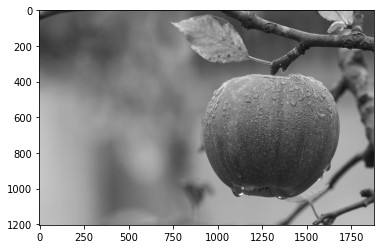

In [1]:
# 0.Pre solution
import PIL.Image as pilimg
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
imageFile = pilimg.open('../img/Gray_Apple.jpeg') 
matrixA = np.array(imageFile)

plt.imshow(matrixA, cmap='gray') # Display original image file
print('\nGray_Apple.jpeg\n')

image resolution(matrix A) : 1880 x 1204

image resolution(converted matrix A) : 1024 x 1024



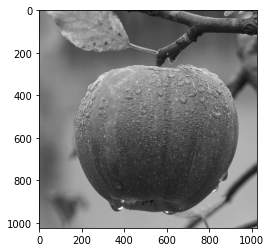

In [2]:
# sol 1.(a) : Take a grayscale image and form a matrix A
def getImageResolution(imgArray) : # get image resolution by Image array
    return len(imgArray[0]), len(imgArray)

print('image resolution(matrix A) : {} x {}\n'.format(*getImageResolution(matrixA)))

# get chopped-off version of A
convertedA = []
x = 750
y = 100
for row in matrixA :
    convertedA.append(row[x:x+1024])
convertedA = convertedA[y:y+1024]
print('image resolution(converted matrix A) : {} x {}\n'.format(*getImageResolution(convertedA)))
plt.imshow(convertedA, cmap='gray')

In [8]:
# sol 1.(b) : For given n = 2t , t = 0, 1, ..., construct an n-point Haar matrix H in the lecture


def getHaarMatrix(n, normalized=True):
    # Allow only size n of power 2
    if n % 2 != 0 and n != 1 :
        return "Err : n should be multiple of 2"
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = getHaarMatrix(n / 2)
    elif n == 1 :
        return np.array([1])
    elif n == 2 :
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h

def printHaarMatrix(n, normalized=True) :
    print('\nHaarMatrix for n = {} (normalized form)\n\n'.format(n,), getHaarMatrix(n, normalized))

printHaarMatrix(1)
printHaarMatrix(2)
printHaarMatrix(4)


HaarMatrix for n = 1 (normalized form)

 [1]

HaarMatrix for n = 2 (normalized form)

 [[ 1  1]
 [ 1 -1]]

HaarMatrix for n = 4 (normalized form)

 [[ 1.          1.          1.          1.        ]
 [ 1.          1.         -1.         -1.        ]
 [ 1.41421356 -1.41421356  0.         -0.        ]
 [ 0.         -0.          1.41421356 -1.41421356]]


In [4]:
# sol 1.(c) : Perform 2-D Discrete Haar Wavelet Transform (DHWT) B = HTAH.
def matrixMultiplier(matrices) :
    result = []
    for idx, matrix in enumerate(matrices) :
        if idx == 0 :
            result = matrix
        else :
            result = np.matmul(result, matrix)
    return result
haarMatrix = getHaarMatrix(len(convertedA))
matrixB = matrixMultiplier([np.transpose(haarMatrix), convertedA, haarMatrix])
print('(width, height) of matrix B : ', getImageResolution(matrixB))
print('\nMatrix B\n', matrixB)

(width, height) of matrix B :  (1024, 1024)

Matrix B
 [[ 688313.5537364   407417.03441755  363155.60766668 ... -470835.0418215
  -252631.94113169 -671458.24282725]
 [ 285884.8186294   181116.29931055  162196.06479788 ... -154662.36652333
  -153933.96267669 -230744.26437225]
 [ 393104.59234059  285913.8621268   179386.95564662 ... -310742.07002707
  -138420.44906657 -390708.96165708]
 ...
 [-440554.97529671 -201470.31148454 -241505.28898845 ...  241115.61252637
   183558.7175657   415448.50925366]
 [-201513.65936244 -184702.45489048 -106614.19264815 ...  171535.78651597
    82069.98830374  183065.61286599]
 [-731909.72025864 -356698.51578668 -389375.80191858 ...  465605.9649236
   253759.23708863  731586.86165088]]


In [5]:
# sol 1.(d) 
# For given k = 2^s , s = 0, 1, ..., construct an n × n matrix Bˆ such that
    # • its k × k upper left corner is equal to the k × k upper left corner of B
    # • all the other entries are zero.
    # So if k = n, Bˆ = B.
import math

def getUpperLeftMatrix(matrix, k) :
    newMatrix = []
    if k > len(matrix) :
        return 'k should be smaller than len(matrix)'
    if not math.log2(k).is_integer() :
        return "'k' should be exponent of 2"
    for index, row in enumerate(matrix) :
        newRow = []
        for idx, element in enumerate(row) :
            if index >= k or idx >= k :
                newRow.append(0)
            else :
                newRow.append(element)
        newMatrix.append(newRow)
    return np.array(newMatrix)

for i in range(11) :
    print('when k is {}\n'.format(pow(2,i)))
    print(getUpperLeftMatrix(matrixB, pow(2, i)), end="\n\n")
    print('=====================================================================\n')

when k is 1

[[688313.5537364      0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 ...
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]]


when k is 2

[[688313.5537364  407417.03441755      0.         ...      0.
       0.              0.        ]
 [285884.8186294  181116.29931055      0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.            

In [6]:
# sol 1.(e) : Perform the inverse 2-D Discrete Haar Wavelet Transform (IDHWT) Aˆ = HBHˆ T
reConvertedA = matrixMultiplier([haarMatrix, matrixB , np.transpose(haarMatrix)])

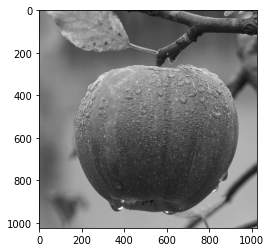

In [7]:
# sol 1.(f) : Show the reconstructed image Aˆ on the screen.
plt.imshow(reConvertedA, cmap='gray')